# **Kegiatan Modul 5**

In [45]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
#import wget
from sklearn.cluster import KMeans
import random
from mpl_toolkits.mplot3d import Axes3D

## **Customer Segmentation with K-Means**

Bayangkan Anda memiliki dataset pelanggan, dan Anda perlu menerapkan segmentasi pelanggan pada data historis ini.
Segmentasi pelanggan adalah praktik mempartisi basis pelanggan menjadi kelompok-kelompok individu yang memiliki karakteristik serupa. Ini adalah strategi yang signifikan karena bisnis dapat menargetkan kelompok pelanggan tertentu ini dan secara efektif mengalokasikan sumber daya pemasaran. Misalnya, satu grup mungkin berisi pelanggan yang untung tinggi dan berisiko rendah, yaitu, lebih mungkin membeli produk, atau berlangganan layanan. Tugas bisnis adalah mempertahankan pelanggan tersebut. Grup lain mungkin termasuk pelanggan dari organisasi nirlaba. Dan seterusnya.

In [46]:
# wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv')

## **Load Data From CSV File**

Sebelum Anda dapat bekerja dengan data, Anda harus menggunakan URL untuk mendapatkan Cust_Segmentation.csv. **5 poin**

```
# Output
```
<img src = "https://i.ibb.co/dJtsP6g/1.png" align = "center">

In [47]:
# TULIS CODE ANDA DISINI
df = pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## **Pre-processing**

Seperti yang Anda lihat, __Address__ dalam dataset ini adalah variabel kategorikal. Algoritma k-means tidak secara langsung berlaku untuk variabel kategori karena fungsi jarak Euclidean tidak benar-benar bermakna untuk variabel diskrit. Jadi, mari jatuhkan fitur ini dan jalankan pengelompokan. **10 poin**

```
# Output
```
<img src = "https://i.ibb.co/X7yGzKX/2.png" align = "center">


In [48]:
# TULIS CODE ANDA DISINI
df["Defaulted"] = df["Defaulted"].fillna(0)
add = df[['Address']]
df = df.drop('Address', axis = 1)
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,6,40,1,23,81,0.998,7.831,0.0,10.9
6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,9,26,1,5,18,0.575,2.215,0.0,15.5
9,10,47,3,23,115,0.653,3.947,0.0,4.0


## **Normalizing over the standard deviation**

Sekarang mari kita normalkan dataset. Tapi mengapa kita perlu normalisasi? Normalisasi adalah metode statistik yang membantu algoritma berbasis matematika untuk menafsirkan fitur dengan besaran dan distribusi yang berbeda secara merata. Kami menggunakan __tandardScaler()__ untuk menormalkan dataset kami. **10 poin**


In [49]:
X = df
y = add



```
# Output

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])
        
```



In [51]:
# TULIS CODE ANDA DISINI
from sklearn.cluster import DBSCAN 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,[1,2,3,4,5,6,7,8]].values
X = np.nan_to_num(X)
X = preprocessing.StandardScaler().fit(X).transform(X.astype('float'))

X[0:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

## **Modeling**

Dalam contoh kami (jika kami tidak memiliki akses ke algoritma k-means), itu akan sama dengan menebak bahwa setiap kelompok pelanggan akan memiliki usia, pendapatan, pendidikan, dll tertentu, dengan beberapa tes dan eksperimen. Namun, dengan menggunakan K-means clustering, kita dapat melakukan semua proses ini dengan lebih mudah.

Mari kita terapkan k-means pada dataset kami, dan lihat label klaster. **20 poin**



```
# Contoh Output

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2
 2 0 0 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 1 2 1 2
 2 1 2 2 2 2 2 2 2 2 2 0 2 0 2 2 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0
 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0
 0 2 2 0 2 0 2 2 0 2 0 2 2 1 2 0 2 0 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 0 0 2 2
 0 2 2 2 0 2 1 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 0 2 0 2 0 0 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 0 0 2 2 0 0 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 2 0 0 2 2 0 2 2 2 2 2 0 0
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0]
```



In [26]:
# TULIS CODE ANDA DISINI
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print(kmeans.labels_)

[2 0 1 2 0 0 2 2 2 0 1 2 2 2 1 2 2 2 0 2 2 2 1 0 0 2 2 2 2 2 2 0 1 2 2 2 1
 1 2 0 1 0 2 0 2 0 2 2 2 2 0 0 1 2 1 1 1 2 2 2 0 2 0 0 2 2 2 1 2 1 2 2 2 2
 2 2 2 2 0 2 2 1 0 2 0 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 1 0 2 1 1 0 2 2 2 2 2
 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 2 2 1
 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 2 1 0 1 2 2 0 1
 0 2 2 2 2 2 0 2 1 2 2 2 0 0 2 0 2 1 2 2 1 2 0 2 1 2 2 2 2 2 1 1 0 2 2 1 0
 2 2 2 2 0 2 2 1 2 2 2 2 0 2 2 1 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 1 2 1 2
 2 2 0 2 1 0 1 2 0 2 2 1 2 2 2 2 1 1 1 2 2 2 0 2 2 0 2 0 2 2 0 2 2 2 1 2 2
 1 2 1 0 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 0 2 1 2 2 2 1 1 2 2 2 0 1
 2 2 1 2 0 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 1 2 1 2 2 2 0 0 2
 1 2 0 1 1 2 2 2 1 2 2 2 2 2 0 2 0 2 2 2 2 1 2 1 2 2 2 0 2 2 2 2 1 2 2 1 1
 0 2 2 2 2 2 1 1 2 0 1 0 2 2 1 2 2 0 0 2 1 2 2 0 2 1 2 0 2 2 2 0 2 2 2 2 0
 2 1 2 2 2 2 0 1 2 2 0 2 1 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 2 0 2 1 2 2 2 1 2
 1 2 2 2 2 2 0 1 1 2 0 2 

## **Insights**

Tetapkan label klaster untuk setiap baris dalam bingkai data. **5 poin**

```
# Output
```
<img src = "https://i.ibb.co/7gbF6TS/3.png" align = "center">

In [28]:
# TULIS CODE ANDA DISINI
df['Clus_km'] = kmeans.labels_
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0
5,6,40,1,23,81,0.998,7.831,0.0,10.9,0
6,7,38,2,4,56,0.442,0.454,0.0,1.6,2
7,8,42,3,0,64,0.279,3.945,0.0,6.6,2
8,9,26,1,5,18,0.575,2.215,0.0,15.5,2
9,10,47,3,23,115,0.653,3.947,0.0,4.0,0


Kita dapat dengan mudah memeriksa nilai centroid dengan rata-rata fitur di setiap kluster. **5 poin**

```
# Output
```
<img src = "https://i.ibb.co/QdhLVSX/4.png" align = "center">

In [9]:
# TULIS CODE ANDA DISINI
rt = df.groupby('Clus_km').mean()
rt

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


Sekarang, mari kita lihat distribusi pelanggan berdasarkan usia dan pendapatan mereka: **15 poin**

```
# Output
```
<img src = "https://i.ibb.co/dPhLWM2/5.png" align = "center">

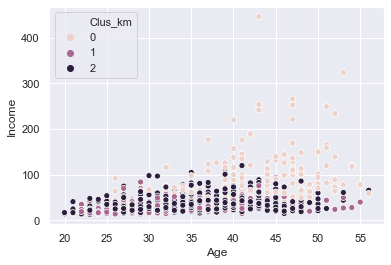

In [10]:
# TULIS CODE ANDA DISINI
sns.set(color_codes=True)
sns.scatterplot(x='Age', y='Income',hue='Clus_km', data=df) 
plt.show()

Sekarang, buat plot dengan 3 parameter education, age dan income: **15 poin**

```
# Output
```
<img src = "https://i.ibb.co/kcx2LFp/6.png" align = "center">

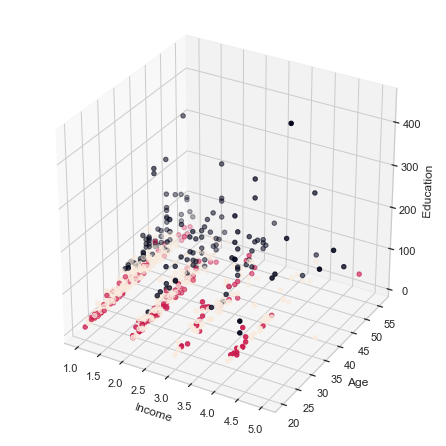

In [18]:
# TULIS CODE ANDA DISINI
# sns.scatterplot(x='Age', y='Income',z='Edu',hue='Clus_km', data=df) 
# plt.show()

sns.set_style("whitegrid")

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

y = df['Age']
z = df['Income']
x = df['Edu']


ax.scatter(x, y, z, c=df['Clus_km'], marker='o')
ax.set_ylabel('Age')
ax.set_xlabel('Income')
ax.set_zlabel('Education')

plt.show()

Jelaskan kesimpulan dari hasil yang anda dapatkan dari kegiatan terkait segmentasi pelanggan diatas kepada asisten **20 poin**